### Load a FaceNet Model in Keras

In [1]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


### Develop a Face Classification System

In [50]:
import numpy as np
b = np.load('5-celebrity-faces-dataset.npz')
print(b.files)
X_train = b['arr_0']
Y_train = b['arr_1']
print(f'X_train Size : {X_train.shape}')
print(f'Y_train Size : {Y_train.shape}')
X_val = b['arr_2']
Y_val = b['arr_3']
print(f'X_val Size : {X_val.shape}')
print(f'Y_val Size : {Y_val.shape}')

['arr_0', 'arr_1', 'arr_2', 'arr_3']
X_train Size : (93, 160, 160, 3)
Y_train Size : (93,)
X_val Size : (25, 160, 160, 3)
Y_val Size : (25,)


### Visualization

In [40]:
Y_train

array(['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna',

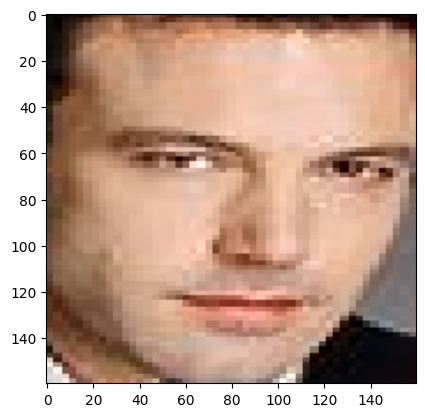

In [39]:
plt.imshow(X_train[5])

### Create Face Embeddings

In [61]:
# normalize the train and test samples face images
X_train_norm = np.zeros(X_train.shape)
for index, face in enumerate(X_train):
    face_pixels = face.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    X_train_norm[index] = (face_pixels - mean) / std
    
X_val_norm = np.zeros(X_val.shape)
for index, face in enumerate(X_val):
    face_pixels = face.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    X_val_norm[index] = (face_pixels - mean) / std

In [73]:
X_train_embedings = model.predict(X_train_norm)
X_val_embedings = model.predict(X_val_norm)
print(f'X_train_embedings : {X_train_embedings.shape}')
print(f'X_val_embedings : {X_val_embedings.shape}')

1/1 [==============================] - 0s 462ms/step
X_train_embedings : (93, 128)
X_val_embedings : (25, 128)


### Perform Face Classification

In [90]:
from sklearn.preprocessing import Normalizer
# normalize input embeding vectors
transformer = Normalizer(norm='l2')
X_train_emb_norm = transformer.transform(X_train_embedings)
X_val_emb_norm = transformer.transform(X_val_embedings)

### how does sklearn normalize the embedings?
If you square each value in the output and then add them together, the result is 1, or very close to 1.

In [91]:
np.linalg.norm(X_train_embedings[0])

12.53065

In [92]:
np.linalg.norm(X_train_emb_norm[0])

1.0

In [93]:
from sklearn.preprocessing import LabelEncoder

# label encode targets
le = LabelEncoder()
le.fit(Y_train)
Y_train_norm = le.transform(Y_train)
Y_val_norm = le.transform(Y_val)

In [94]:
Y_train_norm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [95]:
from sklearn.svm import SVC
# fit model
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train_emb_norm, Y_train_norm)

SVC(kernel='linear')

In [99]:
X_train_emb_norm.shape

(93, 128)

In [97]:
from sklearn.metrics import accuracy_score
# predict
yhat_train = SVM_model.predict(X_train_emb_norm)
yhat_val = SVM_model.predict(X_val_emb_norm)
# score
score_train = accuracy_score(Y_train_norm, yhat_train)
score_val = accuracy_score(Y_val_norm, yhat_val)
# summarize
print('Accuracy: train=%.3f, validation=%.3f' % (score_train*100, score_val*100))

Accuracy: train=98.925, validation=100.000
